# Simulation and Performance Evaluation - Homework 2

### University of Trento - A.Y. 2019 / 2020

Lotito Quintino Francesco - 215032

Zanella Davide - 211463

---

**Important:** we delivered two files, a .ipynb file (jupyter notebook) and a .html file (export of the notebook), if the .ipynb file is run we expect the datasets to be in the same directory of this notebook in order to be read as input.

## Exercise 1

### Problem statement

Load the data from the CSV file `data_ex1.csv`. This data represents measurements of some quantity over a few days. In each line: the 1st value refers to the time of the measurement; the 2nd value is the measurement output. If you draw a scatter plot, you should see a clear trend in the data.

1. Use least squares to remove the trend. You only need polynomial functions for this.
2. After having verified that a good value for the maximum degree of the the polynomial is 5, remove the trend from the data and fit a Gaussian distribution to the resulting dataset.
3. Give the mean and variance of the distribution, and draw a QQ-plot to determine if the Gaussian approximation holds. Give a prediction interval for future samples from this Gaussian distribution.
4. Discuss what would happen if you fit a polynomial of degree different than 5 to the data.

### Solution

Firstly, we define a function to load the dataset

In [1]:
def load():
    file = open("data_ex1.csv", "r")
    values = [[float(x) for x in line.split(",")] for line in file.readlines()]
    return values

Then the dataset could be loaded and the data splitted in order to obtain two arrays. The x_vals array contains the time of the measures and the measurement outputs are stored in y_vals array.

We initially sort the data and this will be useful later on.

In [2]:
values = load()
values = sorted(values, key=lambda x: x[0])

x_vals = [v[0] for v in values]
y_vals = [v[1] for v in values]

As can be seen in the following scatter plot, the data follows a clear trend.

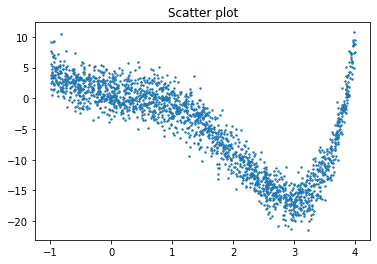

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_vals, y_vals, s=2)

plt.title('Scatter plot')
plt.show()

We are asked to remove th trend using least squares method with polynomial functions.

So let's start by defining some functions to do this. Firstly, we need a function to compute the A matrix, which is structured as follows:

$
A =
\left(
\begin{array}{cccc}
      1 & f_1(x_1) & ... & f_m(x_1) \\
      \vdots & \vdots & \vdots & \vdots \\
      1 & f_1(x_n) & ... & f_m(x_n) \\
\end{array} 
\right)
$

So, $x_i$s are the measurement values, while $m$ is the maximum degree of the polynomial. To simply the work, we decided to set the functions $f_i$ to a polynomial of degree $i$. 

$f_i(x) = x^i$

In [4]:
def compute_A_row(x, max_degree):
    row = []
    for d in range(max_degree):
        row.append(x**d)
    return row

In [5]:
def compute_A_matrix(max_degree):
    return [compute_A_row(x, max_degree+1) for x in x_vals]

Given the $A$ matrix and the $y$ vector, composed by the the measured values, we have to find $b$ such that $\mid A b - y \mid ^2$ is minimum.

In order to achieve it, we compute the following operation in a specific function:

$\hat{b} = (A' A)^{-1} A' y$

To make operations over matrices we used the `numpy` library.

In [6]:
import numpy as np

def compute_b(A):
    y = np.array(y_vals)

    A = np.array(A)
    A_tr = A.transpose()
    b = np.linalg.inv(A_tr.dot(A)).dot(A_tr).dot(y)
    np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
    print("Values of b: ", b)
    return b

In the following function we compute the new $y$ array by using the $b$ array and the computed $A$ matrix.

In [7]:
def compute_new_y_values(b):
    y_new = []

    for x in x_vals:
        new_val = 0
        for d in range(len(b)):
            new_val += b[d] * x**d
        y_new.append(new_val)
    return y_new

Now, we define a function to plot the scatter of the measurements and the trend in the data by using the $y$ array computed by the previous function.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(y_new, title):
    plt.scatter(x_vals, y_vals, s=2)
    plt.plot(x_vals, y_new, color="red")

    plt.title(title)
    plt.show()

Now, let's find the best degree for the polynomial functions in order to approximate the trend in the data in a proper way. We proceed by computing, for $d = 1, .., 9$, the $A$ matrix, calculating the $b$ array and lastly plotting the graph after calculating the trend in the data with the array $y$.

Values of b:  [0.297 -3.550]


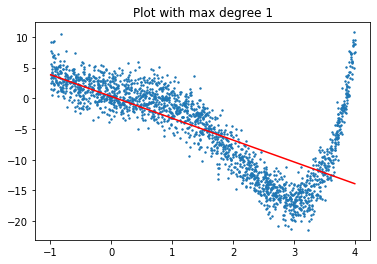

Values of b:  [0.431 -6.347 0.936]


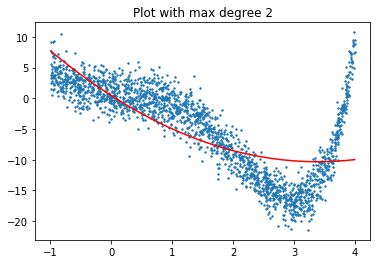

Values of b:  [3.634 -2.068 -5.589 1.462]


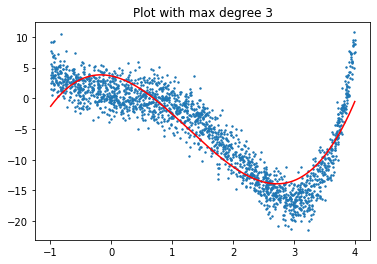

Values of b:  [0.685 0.149 1.079 -3.494 0.829]


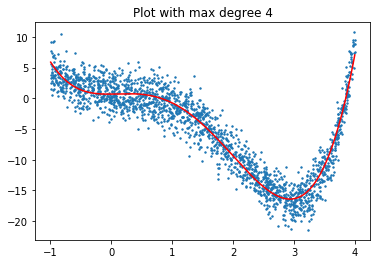

Values of b:  [0.884 -1.247 0.850 -1.738 -0.033 0.116]


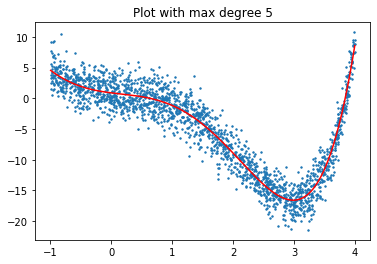

Values of b:  [0.918 -1.064 0.601 -1.919 0.255 0.013 0.012]


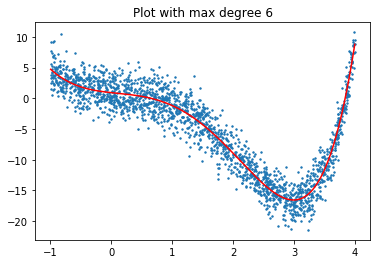

Values of b:  [0.838 -1.084 1.179 -2.168 -0.209 0.427 -0.106 0.011]


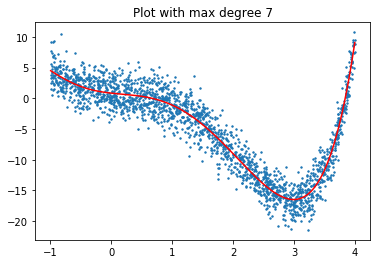

Values of b:  [0.886 -1.316 0.825 -1.309 -0.203 -0.221 0.293 -0.083 0.008]


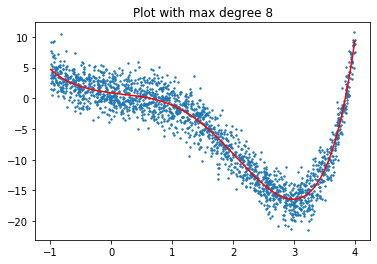

Values of b:  [0.878 -1.538 0.992 -0.582 -0.906 -0.505 0.879 -0.357 0.063 -0.004]


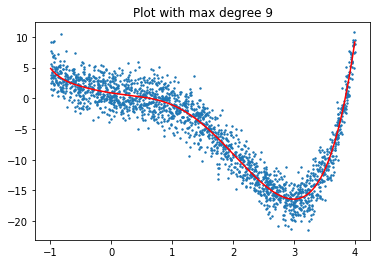

In [9]:
%matplotlib inline

for d in range(1, 10):
    A = compute_A_matrix(d)
    b = compute_b(A)
    y_new = compute_new_y_values(b)
    plot(y_new, 'Plot with max degree {}'.format(d))

Analysing the resulting plots, until the forth degree, the red line doesn't describe the trend in the data with enough precision. With the polynomial of degree four, the result is pretty good, but the trend is better represented by the fifth degree, especially at the left and right borders of the plot.
***
Now, we remove the trend after choosing 5 as the maximum degree of the polynomials. We recompute the $A$ matrix, $b$ and $y$ arrays for the next steps.

Values of b:  [0.884 -1.247 0.850 -1.738 -0.033 0.116]


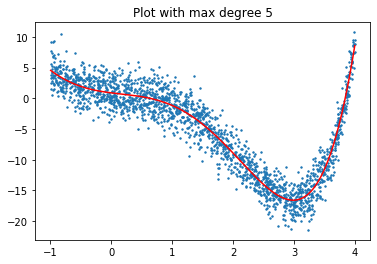

In [10]:
degree = 5
A = compute_A_matrix(degree)
b = compute_b(A)
y_new = compute_new_y_values(b)
plot(y_new, 'Plot with max degree {}'.format(degree))

Now, it is asked to remove the trend from the data. To do this, we simpy recompute the measurement outputs by removing from each value the corresponding value of the trend, previously computed. 

In [11]:
y_vals = [y_vals[i] - y_new[i] for i in range(len(y_vals))]

After plotting the scatter of the obtained dataset, it can be clearly seen that the trend has been removed.

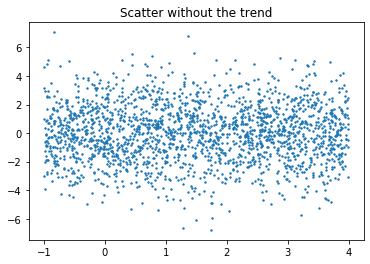

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_vals, y_vals, s=2)

plt.title('Scatter without the trend')
plt.show()

The distribution of the obtained dataset seems to behave like a Gaussian distribution.

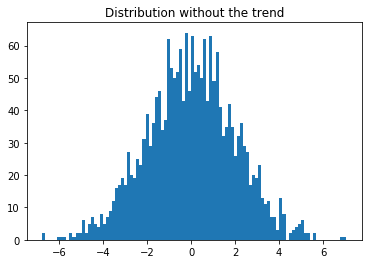

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(y_vals, bins=100)

plt.title('Distribution without the trend')
plt.show()

Now, some additional functions are needed, in particular the mean function and the standard deviation one.

In [14]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [15]:
from math import sqrt

def compute_student_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return sqrt(tot / (len(values)-1))

Now, we use the previous functions to compute the mean and the standard deviation of the Gaussian that can fit our dataset.

In [16]:
mean = compute_mean(y_vals)
std_dev = compute_student_std_dev(y_vals)

print("Gaussian mean: {:.3f}".format(mean))
print("Gaussian standard deviation: {:.3f}".format(std_dev))

Gaussian mean: 0.000
Gaussian standard deviation: 1.998


In order to create a QQ-plot we need to find the quantiles of a normal distribution for the x axis. To achieve it we implemented a function `transform` that computes the $F^{-1}$ of the CDF of a normal, so practically a PPF. The loc parameter is the mean of the dataset, while the scale is the standard deviation.

For the $x$ values of the QQ-plot we compute the values $x_i = F^{-1}(\frac{i}{n + 1})$, while for the $y$ axis we take the sorted values of our Guassian derived from the dataset.

In [17]:
from scipy.stats import norm

transform = lambda x: norm.ppf(x, loc=mean, scale=std_dev)
data = [[transform(i / (len(y_vals) + 1)), y_vals[i]] for i in range(len(y_vals))]

x_qq = sorted([d[0] for d in data])
y_qq = sorted([d[1] for d in data])

Analysing the resulting QQ-plot, we can see that the distribution mainly follows the diagonal of the graph, meaning that the dataset without the trend behaves like a Gaussian distribution.

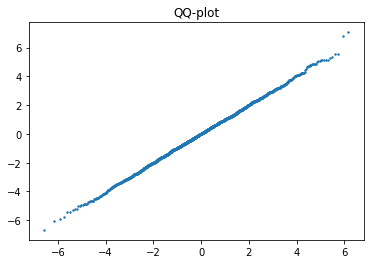

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_qq, y_qq, s=2)

plt.title('QQ-plot')
plt.show()

After asserting that the dataset without the trends behaves like a Gaussian, we can apply the Theorem 2.6 of the slides `Lesson on statistical summaries, confidence/prediction intervals, and the iid assumption` and compute the Prediction interval.

We set $\alpha = 0.05$ finding that $\eta = 1.96$. Now we can compute the confidence interval using the formula:

$
[\hat{\mu} - \eta \hat{\sigma}, \hat{\mu} + \eta \hat{\sigma}]
$

where the $\hat{\sigma}$ is computed using the $t_{-1}$ Student distribution.

In [19]:
student_std = compute_student_std_dev(y_vals)

print("Student n-1 standard deviation: {:.3f}".format(student_std))

pi_low = mean - 1.96*student_std
pi_up = mean + 1.96*student_std

print("Prediction interval 95%: [{:.3f}, {:.3f}]".format(pi_low, pi_up))

Student n-1 standard deviation: 1.998
Prediction interval 95%: [-3.916, 3.916]


With a different degree for the polynomials fitting the distribution of the dataset, we could have two different scenarios:

1. With a degree lower than 5, we would use some polynomial functions that actually would not describe the dataset and, going ahead, we would remove only some part of the noise. As a consequence, the resulting histogram of the distribution without the noise would not behave like a Gaussian and the QQ-plot would not represent a straight line.

2. With a degree higher than 5, we would obtain some functions that, with the increasing of the degree, tends to overfit the dataset, instead of generalizing it. The noise in the original dataset would not be removed and the result would not be a Gaussian.

## Exercise 2

### Problem statement

Load the data from the CSV file `data_ex2.csv`. These are samples from three different, independent Gaussian distributions, all mixed together.

1. Implement the Expectation-Maximization algorithm to fit a mixture of three Gaussian distributions to the data. Try both with and without the prior update step. Discuss the results.
2. Give the parameters of the distributions thus found, and plot the corresponding PDFs on top of the empirical PDFs of the data (e.g., the histogram).

### Solution

Firstly, we load the dataset and print its size.

In [20]:
def load():
    file = open("data_ex2.csv", "r")
    values = [float(x) for x in file.readlines()]
    return values

In [21]:
values = load()

print("Numer of samples:", len(values))

Numer of samples: 8478


Now, we can plot a scatter of the dataset loaded and an histogram of the distribution.

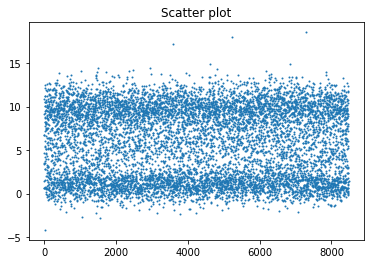

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(len(values))

plt.scatter(x, values, s=1)

plt.title('Scatter plot')
plt.show()

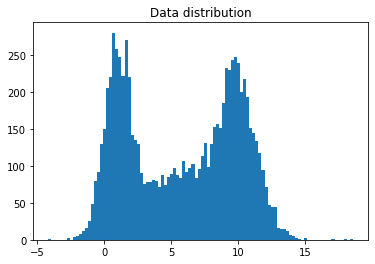

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(values, bins=100)

plt.title('Data distribution')
plt.show()

We start defining some functions that would be useful for the Expectation-Maximization process.

The first function calculates the probability of a point given a certain class.

$P\{x_i \mid class_k\} = \frac{1}{\sqrt{2 \pi} \sigma_{class_k}} exp(-\frac{(x_i - \mu_{class_k})^2}{2\sigma_{class_k}^2})$

In [24]:
from math import sqrt, exp, pi

def prob_x_given_class(x, mean, std):
    return 1 / (sqrt(2*pi) * std) * exp(-(x - mean)**2 / (2 * std**2))

The following function computes the probability of a class given a certain point.

$P\{class_k \mid x_i\} = \frac{P\{x_i \mid class_k\}P\{class_k\}}{\sum_{j=1}^{3} P\{x_i \mid class_j\}P\{class_j\}}$

In [25]:
def prob_class_given_x(x, class_idx, means, std_devs, probs):
    all_classes = []
    for i in range(len(probs)):
        all_classes.append(prob_x_given_class(x, means[i], std_devs[i]) * probs[i])
    
    return (all_classes[class_idx]) / sum(all_classes)

It's needed a function to compute the mean of the Gaussian of a specific class. The mean is calculated as follows:

$\mu_{class_k} = \frac{\sum_{i=1}^{n} P\{class_k \mid x_i\} x_i}{\sum_{i=1}^{n} P\{class_k \mid x_i\}}$

In [26]:
def compute_mean_of_class(class_idx, x_probs):
    num = sum([x_probs[i][class_idx]*values[i] for i in range(len(values))])
    den = sum([x_probs[i][class_idx] for i in range(len(values))])
    return num/den

The following function computes the standard deviation of the Gaussian of a class.

$\sigma_{class_k} = \sqrt{\frac{\sum_{i=1}^{n} P\{class_k \mid x_i\} (x_i - \mu_{class_k})^2}{\sum_{i=1}^{n} P\{class_k \mid x_i\}}}$

In [27]:
def compute_std_dev_of_cass(class_idx, means, x_probs):
    mean = means[class_idx]
    num = sum([x_probs[i][class_idx]*(values[i] - mean)**2 for i in range(len(values))])
    den = sum([x_probs[i][class_idx] for i in range(len(values))])
    return sqrt(num/den)

Now, it's defined a function that computes the prior update of a specific class.

$P\{class_k\} = \frac{\sum_{i=1}^{n} P\{class_k \mid x_i\}}{n}$

In [28]:
def compute_prior_update(class_idx, x_probs):
    tot = sum([x_probs[i][class_idx] for i in range(len(values))])
    return tot / len(values)

We proceed defining the Expectation-Maximization function, which, firstly, initializes the probabilities of the three classes to be equal. Even the means and the standard deviations are defined, but their values are some random values not too high, in order to make the algorithm converges fastly.

For every iteration, the function computes the probabilities of each point to begin to each class. After this, the means and the standard deviations of the Gaussians are recomputed using the sample points. In case we want to do the prior update, the probabilities of the three Gaussian are recomputed from the distribution of the sample points.

The number of the iterations is parametrized, in order to test different number of iterations and see the results.

In [29]:
def compute_EM(iterations, prior_update=False):
    probs = [1/3] * 3

    min_mean = min(values)
    incr_mean = (max(values) - min(values)) / 3
    means = [min_mean, min_mean + incr_mean, min_mean + 2*incr_mean]
    std_devs = [10] * 3

    x_probs = [[1/3] * len(probs)] * len(values)
    
    for _ in range(iterations):
        for i in range(len(values)):
            x_probs[i] = [prob_class_given_x(values[i], c, means, std_devs, probs) for c in range(len(probs))]

        means = [compute_mean_of_class(c, x_probs) for c in range(len(probs))]
        std_devs = [compute_std_dev_of_cass(c, means, x_probs) for c in range(len(probs))]
        
        if prior_update:
            probs = [compute_prior_update(c, x_probs) for c in range(len(probs))]
            
    return x_probs, means, std_devs, probs

Let's execute the Expectation-Maximization function without the prior update. 

After a tuning phase of the number of iterations, we conclude that 300 is a good value in order to allow the function to converge.

The probabilities, beacuse of the missing of the prior update, are all equals, while the Gaussians seems to be spreaded in order to cover the dataset.

In [30]:
x_probs, means, std_devs, probs = compute_EM(300)

In [31]:
def print_well(x):
    print_x = "["
    c = 0
    for i in x:
        if c == 0:
            print_x = print_x + "{:.3f}".format(i)
        else:
            print_x = print_x + ", " + "{:.3f}".format(i)
        c += 1
    print_x += "]"
    return print_x

print("Gaussians means: ", print_well(means))
print("Gaussians standard deviations: ", print_well(std_devs))
print("Gaussians probabilities: ", print_well(probs))

Gaussians means:  [1.013, 6.200, 10.045]
Gaussians standard deviations:  [1.013, 2.811, 1.337]
Gaussians probabilities:  [0.333, 0.333, 0.333]


The following is a function that extracts the elements associated to a Gaussian. It returns all the values for which the parametrized Gaussian has higher probability than the others.

In [32]:
def get_elems_class(class_idx, x_probs):
    result = []
    for i in range(len(values)):
        if np.argmax(x_probs[i]) == class_idx:
            result.append(values[i])

    return result

Let's plot the three Gaussian, calculated without the prio update, on top of the original probability distribution function.

It can be seen that they fit pretty well the original PDF, some plotting problems comes from the number of bins of the histogram, which is approximated.

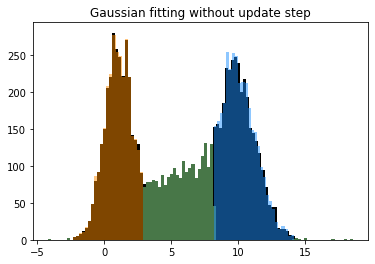

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import floor

orange = get_elems_class(0, x_probs)
green = get_elems_class(1, x_probs)
blue = get_elems_class(2, x_probs)

n_bins = lambda x: floor((max(x)-min(x)) / ((max(values)-min(values))/100))

plt.hist(values, bins=n_bins(values), color="black")

plt.hist(orange, bins=n_bins(orange), color="darkorange", alpha=0.5)
plt.hist(green, bins=n_bins(green), color="lightgreen", alpha=0.5)
plt.hist(blue, bins=n_bins(blue), color="dodgerblue", alpha=0.5)

plt.title('Gaussian fitting without update step')
plt.show()

Now, let's compute the Expectation-Maximization with the prior update.

The results are slightly different from the ones obtained without the prior update. This means that in this particular case the probabilities of the three Gaussians are closer to be $1/3$ and so the benefits of the prior update doesn't come out.

In [34]:
x_probs, means, std_devs, probs = compute_EM(300, True)

def print_well(x):
    print_x = "["
    c = 0
    for i in x:
        if c == 0:
            print_x = print_x + "{:.3f}".format(i)
        else:
            print_x = print_x + ", " + "{:.3f}".format(i)
        c += 1
    print_x += "]"
    return print_x

print("Gaussians means: ", print_well(means))
print("Gaussians standard deviations: ", print_well(std_devs))
print("Gaussians probabilities: ", print_well(probs))

Gaussians means:  [0.989, 6.051, 10.035]
Gaussians standard deviations:  [0.980, 2.934, 1.330]
Gaussians probabilities:  [0.312, 0.353, 0.335]


Even the histograms of the three Gaussians over the original PDF tell us that, in this case, we don't have big enhancements with the prior update.

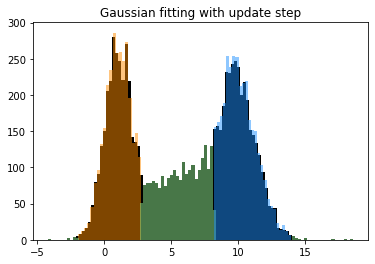

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

orange = get_elems_class(0, x_probs)
green = get_elems_class(1, x_probs)
blue = get_elems_class(2, x_probs)


n_bins = lambda x: floor((max(x)-min(x)) / ((max(values)-min(values))/100))

plt.hist(values, bins=n_bins(values), color="black")

plt.hist(orange, bins=n_bins(orange), color="darkorange", alpha=0.5)
plt.hist(green, bins=n_bins(green), color="lightgreen", alpha=0.5)
plt.hist(blue, bins=n_bins(blue), color="dodgerblue", alpha=0.5)

plt.title('Gaussian fitting with update step')
plt.show()

Most of the time, we couldn't know at the beginning the probabilities of the different distributions. So the E-M with the prior update is the best way to achieve a good result. In our case, there isn't a big difference but with the prior update, we obtained a more accurate result and a better clustering.

## Exercise 3

### Problem statement

The binomial distribution describes the statistics of the number of successful events for a Bernoulli experiment repeated $N$ times, where the probability of success of each experiment is $p$.

1. Execute $N_{\text{tr}} = 10000$ trials, each made of $N=100$ Bernoulli experiments with probability of success $p= 0.05$. Hint: to test whether a Bernoulli experiment is successful or not, draw a random number $u \sim \textit{U}(0,1)$, and check if $u \leq p$.

2. For each trial $i$, count the number of successes $s_i$, and draw the empirical probability mass function (PMF) of the number of successes throughout all trials. Compare against the theoretical binomial PMF.

3. Compare the empirical and the theoretical binomial distributions against a Poisson distribution of parameter $\lambda=Np$. Repeat the comparison for different values of $N$ and $p$. When does the Poisson PMF accurately approximate the binomial PMF?

### Solution

In [36]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

To solve this exercise, we define a function `execute` which generates the outcomes of $N = 100$ Bernoulli experiments (we follow the hint to check if a single experiment is successful or not).

In [37]:
def execute(N = 100, p = 0.05):
    outcomes = []
    for _ in range(N):
        if random.uniform(0,1) <= 0.05:
            outcomes.append(1)
        else:
            outcomes.append(0)
    return outcomes

We also define a function `get_theoretical_binomial` which will be useful to compare our empirical results with the theoretical binomial PMF.

In [38]:
def get_theoretical_binomial(N = 100, p = 0.05):
    R = N
    d = []
    for i in range(R):
        d.append(p**i * (1-p)**(N-i) * (math.factorial(N) / (math.factorial(i) * math.factorial(N-i))))
    return d

Here we call the function execute $N_{\text{tr}} = 10000$ times, for each trial $i$, we count the number of successes $s_i$. After this, we plot the empirical PMF of the number of successes throughout all trials and we compare it to the theoretical binomial PMF.

In [39]:
N_trials = 10000
R = 100
trials = []
for _ in range(N_trials):
    trials.append(execute())

distr_succ = {}
for trial in trials:
    succ = sum(trial)
    if succ in distr_succ:
        distr_succ[succ] += 1
    else:
        distr_succ[succ] = 1

for key in list(distr_succ.keys()):
    distr_succ[key] /= N_trials
    
for i in range(R):
    if i not in distr_succ:
        distr_succ[i] = 0

In [40]:
theoretical_binomial = get_theoretical_binomial()

In [41]:
print_emp = []
print_R = int(R/2)
for i in range(print_R):
    print_emp.append(distr_succ[i])

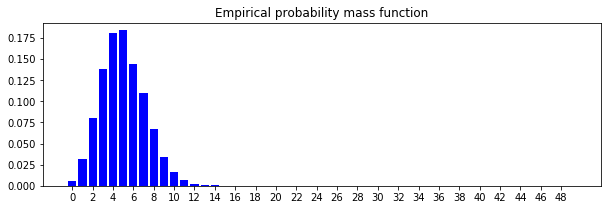

In [42]:
%matplotlib inline

fig = plt.figure(figsize=(10,3))
print_R = int(R/2)
plt.bar(range(print_R), print_emp, color='b')
plt.title("Empirical probability mass function")
plt.xticks(range(0, print_R, 2))
plt.show()

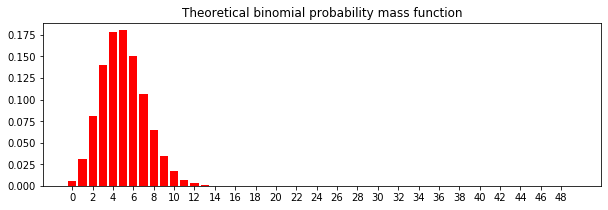

In [43]:
%matplotlib inline

fig = plt.figure(figsize=(10,3))
print_R = int(R/2)
plt.bar(range(print_R), get_theoretical_binomial()[:print_R], color='r')
plt.title("Theoretical binomial probability mass function")
plt.xticks(range(0, print_R, 2))
plt.show()

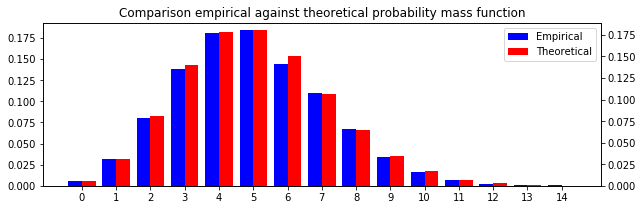

In [44]:
%matplotlib inline

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
a = ax.bar(np.arange(15) , print_emp[:15], color='b', width=0.4, align='center')

ax2 = ax.twinx()
b = ax2.bar(np.arange(15)  + 0.4, get_theoretical_binomial()[:15], color='r', width=0.4, align='center')

ax.set_xticks(np.arange(15) + 0.4 / 2)
#plt.xticks(range(0, print_R, 2))
ax.set_xticklabels(range(0, print_R, 1))
ax.legend( (a[0], b[0]), ('Empirical', 'Theoretical') )
plt.title("Comparison empirical against theoretical probability mass function")

plt.show()

For the next step, we are asked to consider the Poisson distribution of parameter $\lambda=Np$, and to repeat the comparison.

In [45]:
def get_poisson(N = 100, p = 0.05):
    R = N
    l = N * p
    d = []
    for i in range(0, R):
        d.append(l**i/math.factorial(i) * math.e ** (-l))
    return d

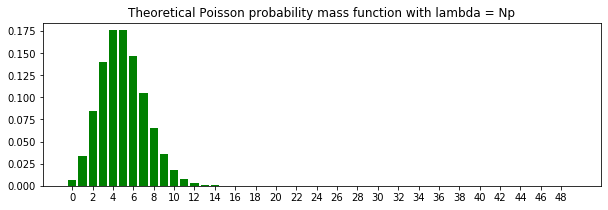

In [46]:
%matplotlib inline

fig = plt.figure(figsize=(10,3))
print_R = int(R/2)
plt.bar(range(print_R), get_poisson()[:print_R], color='g')
plt.title("Theoretical Poisson probability mass function with lambda = Np")
plt.xticks(range(0, print_R, 2))
plt.show()

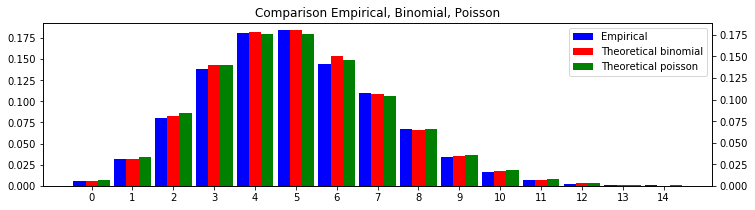

In [47]:
%matplotlib inline

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
a = ax.bar(np.arange(15) , print_emp[:15], color='b', width=0.3, align='center')

ax2 = ax.twinx()
b = ax2.bar(np.arange(15)  + 0.3, get_theoretical_binomial()[:15], color='r', width=0.3, align='center')

c = ax2.bar(np.arange(15)  + 0.6, get_poisson()[:15], color='g', width=0.3, align='center')

ax.set_xticks(np.arange(15) + 0.9 / 3)
ax.set_xticklabels(range(0, print_R, 1))
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()
ax.legend( (a[0], b[0], c[0]), ('Empirical', 'Theoretical binomial', 'Theoretical poisson') )
plt.title("Comparison Empirical, Binomial, Poisson")

plt.show()

As we can see, all the three distributions look similar. Explaining this similarity is trivial for the empirical and theoretical binomial distribution, since our empirical distribution is a binomial and converges to the theoretical distribution with enough samples. On the other hand, the similarity between the binomial and the Poisson distribution is interesting. 

For the next step, we are asked to understand when the Poisson PMF accurately approximates the binomial PMF. To do so, we plot these distributions using different values of the parameters $N$, $p$, and $\lambda = Np$.

In [48]:
%matplotlib inline
def compare(N, p, disable=False):    
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    a = ax.bar(np.arange(N) , get_poisson(N, p), color='g', width=0.5, align='center')

    ax2 = ax.twinx()
    b = ax2.bar(np.arange(N)  + 0.5, get_theoretical_binomial(N, p), color='r', width=0.5, align='center')
    
    
    ax.set_xticks(np.arange(N) + 0.4 / 2)
    ax.set_xticklabels(range(0, N, 1))
    if disable:
        ax.set_xticks([])
    ax.legend( (a[0], b[0]), ('Poisson', 'Theoretical') )
    plt.title("Comparison Poisson against Binomial PMF: N = {} and p = {}".format(N, p))

    plt.show()

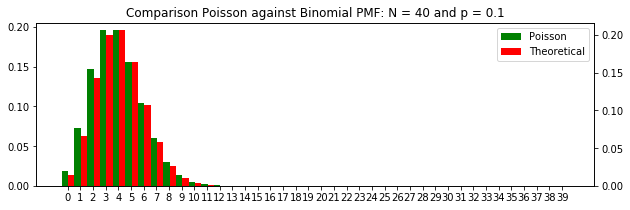

In [49]:
compare(40, 0.1)

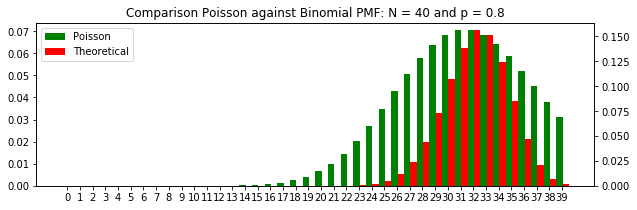

In [50]:
compare(40, 0.8)

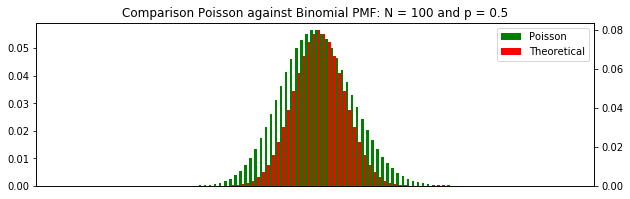

In [51]:
compare(100, 0.5, disable=True)

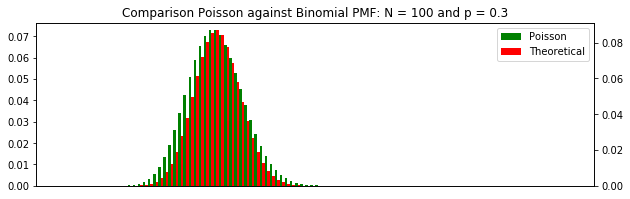

In [52]:
compare(100, 0.3, disable=True)

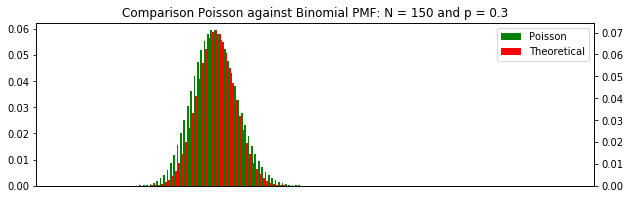

In [53]:
compare(150, 0.3, disable=True)

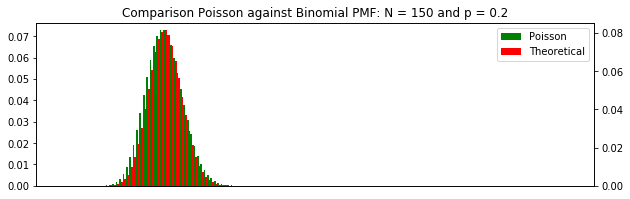

In [54]:
compare(150, 0.2, disable=True)

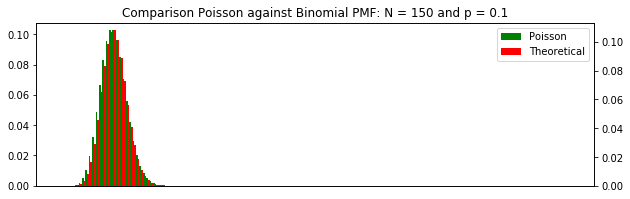

In [55]:
compare(150, 0.1, disable=True)

From these plots, we could think that when the value of $N$ in a binomial distribution is large and the value of $p$ is very small, the binomial distribution can be approximated by a Poisson distribution with parameter $\lambda = Np$.

We can prove this.

Let $X$ be a binomial random variable with parameters $(N, p)$ and let $\lambda=Np$.

$$P\{X=i\} = \frac{N!}{(N-i)!i!}p^i(1-p)^{N-i} = \frac{N!}{(N-i)!i!} \Big( \frac{\lambda}{N} \Big) ^i \Big(1 - \frac{\lambda}{N}\Big)^{N-i}$$

After some computations, this is equal to:
$$\frac{N(N-1)...(N-i+1)}{i!} \frac{\lambda^i}{N^i} \frac{ (1 - \frac{\lambda}{N}^{N}) }{ (1 - \frac{\lambda}{N})^{i}}$$
    
Now, for large $N$ and small probability of success $p$ we have some standard limits to solve:

$$\Big( 1- \frac{\lambda}{N} \Big)^N \approx e^{-\lambda}, \Big( 1- \frac{\lambda}{N} \Big)^i \approx 1, \frac{N(N-1)...(N-i+1)}{N^i} \approx 1$$

And so, for large $N$ and small probability of success $p$,
$$ P\{X=i\} \approx e^{-\lambda}\frac{\lambda^i}{i!}$$

## Exercise 4

### Problem statement

In a popular board game, the players roll two dice at every turn. They want to test the fairness of the dice, so they note the number of occurrences of each possible result, from 2 to 12. The collected data are as follows

<table>
    <tr style="border-bottom:1px solid black">
        <td style="border-right:1px solid black">
            value
        </td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>8</td>
        <td>9</td>
        <td>10</td>
        <td>11</td>
        <td>12</td>
    </tr>
    <tr>
        <td style="border-right:1px solid black">
            # occurrences
        </td>
        <td>1</td>
        <td>4</td>
        <td>2</td>
        <td>7</td>
        <td>10</td>
        <td>9</td>
        <td>9</td>
        <td>14</td>
        <td>7</td>
        <td>5</td>
        <td>3</td>
    </tr>
</table>


1. Find the probability mass function of the distribution
2. Run a chi-squared test on this data to check if it is in accordance with the discrete triangular distribution that characterizes a 2-dice roll:

$$P[X=k] = \frac{1}{36} \cdot
\left\{
\begin{array}{ll}
      k - 1, & k = 2,...,7 \\
      13 - k, & k = 8,9,...,12 \\
\end{array} 
\right.
$$

Discuss the result of the test.

### Solution

Firstly, it's necessary to manually write an array with the values reported in the problem statement.

In [56]:
values = [2] + [3]*4 + [4]*2 + [5]*7 + [6]*10 + [7]*9 + [8]*9 + [9]*14 + [10]*7 + [11]*5 + [12]*3

To better give an idea of the values' distribution we plot an histogram.

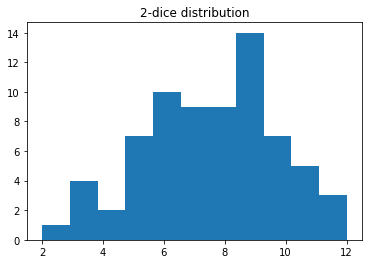

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(values, bins=11)

plt.title('2-dice distribution')
plt.show()

To define the probability mass function, we create a function that takes a number as a parameter. This probability function returns the fraction of the number of times the given number appears in the values, over the total number of dices' rolls.

In [58]:
def prob_mass_function(n):
    return values.count(n) / len(values)

Now we can print all the probabilities to check if the function is working correctly.

In [59]:
for i in range(2, 13):
    p = prob_mass_function(i)
    print("Prob for {} is: {:.3f}".format(i, p))

Prob for 2 is: 0.014
Prob for 3 is: 0.056
Prob for 4 is: 0.028
Prob for 5 is: 0.099
Prob for 6 is: 0.141
Prob for 7 is: 0.127
Prob for 8 is: 0.127
Prob for 9 is: 0.197
Prob for 10 is: 0.099
Prob for 11 is: 0.070
Prob for 12 is: 0.042


The following is an implementation of the discrete triangular distribution that we will use nextly.

In [60]:
def triangolar_distribution(k):
    if k <= 7 and k >= 2:
        v = k - 1
    elif k >= 8 and k <= 12:
        v = 13 - k
    else:
        return None
    return 1/36 * v 

Now we do the Chi-squared goodness of fit test, where we can check if the probability mass function, defined over the dataset, behaves as the discrete triangular distribution.

Basically, for each possible value of the discrete functions, we compute the results of the two functions that we are comparing. With the two results we can compute the following parameter T:

$T = \sum_{i=1}^{k} \frac{(\text{observed} - \text{expected})^2}{\text{expected}}$

In our case $\text{observed}$ is the result of the probability mass function previously defined, while $\text{expected}$ is the discrete triangular distribution.

In [61]:
T = 0
for i in range(2, 13):
    tr = triangolar_distribution(i)
    T += (prob_mass_function(i) - tr)**2 / tr
    
print("Value of T: {:.3f}".format(T))

Value of T: 0.136


The $T$ value is small, meaning that we can accept the hypothesis and state that the chosen distribution correctly models the data.

We can calculate the $p$-value by looking at the tables of the chi-squared with $k - 1$ degrees of freedom, so 10 degrees of freedom since $k = 11$.

$P\{\chi_{k-1}^2 \geq T\} = 1$

As previously anticipated, the hypothesis can be accepted because we obtained a probability of $1$ that the triangular distribution behaves the same as our distribution. 

## Exercise 5

### Problem statement

Compute an approximate value for $\pi$ by using Monte-Carlo simulation to approximate the ratio between the area of a circle of radius $1$ to the area of the square circumscribed to it (which has side length equal to $2$).

1. Set a stopping rule in terms of the confidence interval for the success probability (where a success occurs if a point falls within the circle). Make an algorithm that keeps drawing additional points until the stopping rule is satisfied.

### Solution

Firstly, we need some math.

Let's recall that the area of a circle is $A_c = \pi R^2$ where $R$ is the radius of the circle, in this case $1$. The area of a square is $A_s = l^2$ where $l$ is the side length, in this case $2$. Therefore, the ratio $\frac{A_c}{A_s} = \frac{\pi}{4}$. Now, let's consider the Cartesian coordinate system and consider the square spanning the domain $[-1, 1] \times [-1, 1]$ and the circle centered in the origin with radius $1$. If we sample enough points $P \in [-1, 1] \times [-1, 1]$ then the ratio $\frac{P_{\text{in}}}{P_{\text{tot}}} \approx \frac{A_c}{A_s} = \frac{\pi}{4}$, where $P_{\text{in}}$ is the number of points falling in the circle and $P_{\text{tot}}$ is the total number of sampled points. 

Now, we can express $\pi$ in this form: $\pi \approx 4 \frac{P_{\text{in}}}{P_{\text{tot}}}$.

Another thing we can notice is that the ratio is still the same if we consider only the first quadrant of the Cartesian coordinate system, limiting the domain of the sampled points to $[0, 1] \times [0, 1]$. We will use this observation in the exercise.

The first part of the code is pretty straightforward: we import some basic libraries and define some functions.
The function `sample`, of course, returns a random point $(x,y) \in [0, 1] \times [0, 1]$, this is done using the `random.random()` from the Python standard library. The function `is_inside` checks if the input pair is inside a circle centered in the origin with radius $r$. We re-use some functions from Homework $1$, namely `compute_mean`, `compute_std_dev`, `mean_interval`. Given some samples, these functions return the mean, the std dev, and a confidence interval for the mean. Of course, every time we sample a point we can consider it as a Bernoulli trial (the point can be in the circle, success, or not, insuccess), with probability of success $p=\frac{A_c}{A_s}$.

In [62]:
import random
import math

In [63]:
def sample():
    x = random.random()
    y = random.random()
    return x, y

In [64]:
def is_inside(x, y, r):
    if math.sqrt(x**2 + y**2) < r:
        return True
    else:
        return False

In [65]:
def compute_mean(values):
    tot = 0
    for i in values:
        tot += i
    return tot / len(values)

In [66]:
def compute_std_dev(values):
    mean = compute_mean(values)
    tot = 0
    for i in values:
        tot += (i - mean) ** 2
    return math.sqrt(tot / len(values))

In [67]:
def mean_interval(data, gamma):
    eta = None
    if gamma == 0.95:
        eta = 1.960
    elif gamma == 0.99:
        eta = 2.576
    else:
        # in these excercises we are only interested in 95% and 99% confidence
        pass
    mean = compute_mean(data)
    std_dev = compute_std_dev(data)
    incr = eta * std_dev / math.sqrt(len(data))
    return mean - incr, mean + incr

The algorithm works as follow: until stopping rule is triggered, we sample a point, check if it is inside the circle or not and save the outcome of the Bernoulli trial. We repeat this process at least 1000 times, then we allow the stopping rule to be triggered. We set the algorithm to stop if the distance between the bounds of the 99% confidence interval of the mean of all the samples of the Bernoulli process is less than 0.01 units. This is usually reached after about 50000 iterations, which is usually enough to approximate $\pi$ up to two decimal places.

In [ ]:
import numpy as np

in_points = 0
r = 1
tot = 0
outcomes = []
X = []
Y = []
X_in = []
Y_in = []

while True:
    x, y = sample()
    tot += 1
    
    if is_inside(x, y, r):
        in_points += 1
        outcomes.append(1)
        X_in.append(x)
        Y_in.append(y)
    else:
        outcomes.append(0)
        X.append(x)
        Y.append(y)
    
    a, b = mean_interval(outcomes, 0.99)
        
    if b - a <= 0.01 and tot > 1000:
        break
        
    if tot >= 100000:
        break
    
    if tot % 10000 == 0:
        print("--- Iterations: {} ---".format(tot))
        print("C.I. 99%: [{:.4f}, {:.4f}]".format(a, b))
        print("Approximation of pi: {:.4f}".format(4 * (in_points / tot)))

print("\n+++ Stopping rule triggered after {} iterations +++".format(tot))
print("[{:.4f}, {:.4f}]".format(a, b))
print("{:.4f}".format(4 * (in_points / tot)))

--- Iterations: 10000 ---
C.I. 99%: [0.7783, 0.7993]
Approximation of pi: 3.1552
--- Iterations: 20000 ---
C.I. 99%: [0.7831, 0.7979]
Approximation of pi: 3.1620
--- Iterations: 30000 ---
C.I. 99%: [0.7817, 0.7939]
Approximation of pi: 3.1512
--- Iterations: 40000 ---
C.I. 99%: [0.7830, 0.7935]
Approximation of pi: 3.1529


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=1)
plt.scatter(X_in, Y_in, color='g', s=1)
plt.show()

## Exercise 6

### Problem statement

Verify that the CDF inversion formula for the generation of exponential random variates of average value equalto 2 actually generates exponential variates.
1. Extract $N_\text{tr}$ exponential random variates with the same average value equal to 2 using through the CDF inversion method.
2. Draw a QQ-plot to compare your draws against the quantiles of the exponential distribution with the same average value.
3. What happens if, instead, you draw your QQ-plot against the quantiles of an exponential distribution with a different average value? And what if you increase (e.g., 2x , 4x, ...) the number of exponential draws? Discuss.

### Solution

Let $X$ be an exponential random variable with parameter $\lambda = 2$. The probability density function of $X$ is $p(x)=2e^{−2x}$ with $x>0$.

Let's compute $F$, the cumulative distribution function of $X$.

$$ F(x) = p(X\leq x) = \int_0^x 2e^{-2y} dy = 1 - e^{-2x} $$

Now we can compute the inverse CDF.
$$F^{-1}(x) = -\frac{\ln(1-x)}{2}$$

Every time we need to sample from $X$, we rely on sampling $y$ from $U(0,1)$ and compute $F^{-1}(y)$.

In [ ]:
import random, math

The code is pretty straightforward, we implemented $F^{-1}$ in a more general fashion (not with the fixed parameter $2$ as before) and a function to sample, which samples $y$ from $U(0,1)$ and returns $F^{-1}(y)$.

In [ ]:
def cdf_inv(x, a):
    return - math.log(1 - x) / a 

In [ ]:
def sample(a):
    y = random.random()
    return cdf_inv(y, a)

The function `execute` is the core of the solution, it draws $N_{\text{tr}}$ samples, it can plot the distribution and can draw a QQ-plot to compare the draws against the quantiles of a given exponential distribution.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def execute(N_trials, mean, mean_against, distr=False, qqplot=True):
    N_tr = N_trials
    a = mean
    samples = [sample(a=2) for _ in range(N_tr)]
    
    if distr:
        plt.hist(samples, bins=100)
        plt.title('Sampled distribution, lambda = {}, N_tr = {}'.format(a, N_tr))
        plt.show()
    
    if qqplot:
        data = [[cdf_inv(i / (len(samples) + 1), mean_against), samples[i]] for i in range(len(samples))]
        x_qq = sorted([d[0] for d in data])
        y_qq = sorted([d[1] for d in data])
        plt.scatter(x_qq, y_qq, s=1)
        plt.xlim(0,6)
        plt.ylim(0,6)
        plt.grid()
        plt.title('QQ-plot lambda = {} against lambda = {}, N_tr = {}'.format(mean, mean_against, N_tr))
        plt.show()

In this case we extract $10000$ exponential random variates with average value equal to 2, as asked, and we draw a QQ-plot to compare the draws against the quantiles of the exponential distribution with the same average value. From the resulting QQ-plot, we can see that our samples mainly allign over the diagonal of the plot so we can conclude our samples follow the exponential distribution we expected.

In [ ]:
execute(10000, 2, 2, True, True)

Now we try to increase the amount of exponential draws. In the first case, we draw $2 N_{\text{tr}}$ samples, in the second $4 N_{\text{tr}}$ and in the third $10 N_{\text{tr}}$. We can how the resulting diagonal gets more and more precise.

In [ ]:
execute(20000, 2, 2, False, True)

In [ ]:
execute(40000, 2, 2, False, True)

In [ ]:
execute(100000, 2, 2, False, True)

Now we are asked to draw some QQ-plots to compare our draws against the quantiles of exponential distributions with different average values. We print again the original QQ-plot to make the comparison easier, and then we consider the exponential distributions with $\lambda = 1, 4, 10$.    

In [ ]:
execute(10000, 2, 2, False, True)

In [ ]:
execute(10000, 2, 1, False, True)

In [ ]:
execute(10000, 2, 4, False, True)

In [ ]:
execute(10000, 2, 10, False, True)

We can see how even in this case the points are aligned, but not on the diagonal. We can conclude that our samples follow an exponential distribution, but with a different mean with respect to the exponential distributions we considered to draw these QQ-plots.